# Assignment Python 2
Nama : Syaima Radestya <br>
Kode Peserta : PYTN-KS10-011 <br>
Program : Introduction to Python for Data Science <br>

# Project Overview
***
Dataset NYC Property Sales From Kaggle. This dataset is a record of every building or building unit (apartment, etc) sold in New York City property market over a 12-month period from September 2016 to September 2017.

### Background
This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
1. BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
2. BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
3. BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

## 1. Import Libraries
***
Import required libraries (mengimport beberapa library yang akan digunakan)

In [427]:
import pandas as pd
import numpy as np
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats as scistats
import statsmodels.api as sm
%matplotlib inline

## 2. Exploring and Preprocessing Dataset
***
Pada bagian ini, saya akan menjelaskan tentang pre-processing yang dilakukan pada dataset sebelum visualisasi

In [428]:
# membaca dataset
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN']
df_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

In [429]:
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [430]:
# info dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [431]:
# dimensi dari dataset
df_sales.shape

(84548, 22)

In [432]:
# mengetahui list dari column headers
df_sales.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

### Mengetahui Jumlah Missing Values
Melihat semua nilai unique dari setiap kolom untuk melihat adanya anomali (unstandard missing values)

In [433]:
str_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 
       'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE']
for string_col in str_columns:
    print('NILAI UNIK UNTUK ', string_col)
    print(df_sales[string_col].unique())
    print("="*75)

NILAI UNIK UNTUK  BOROUGH
[1 2 3 4 5]
NILAI UNIK UNTUK  NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON' 'FORDHAM' 'HIGHBRIDGE

### RANGKUMAN
Berikut rangkuman awal pada bagian kolom pada tahap mengidentifikasi missing values: <br>
* Pada kolom 'Unnamed: 0' dan 'EASE-MENT' akan di drop karena tidak terlalu dibutuhkan
* Terdapat nilai ('') pada kolom 'TAX CLASS AT PRESENT' yang diidentifikasi sebagai missing values
* Terdapat nilai ('') pada kolom 'BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER' yang diidentifikasi sebagai missing values
* Terdapat nilai (0) pada kolom 'ZIP CODE', 'YEAR BUILT', 'TOTAL UNITS' yang diidentifikasi sebagai missing values
* Terdapat nilai ('-') pada kolom 'SALE PRICE' yang diidentifikasi sebagai missing values dan nilai ini akan diganti dengan 0 karena dianggap tidak ada transaksi

### Data Cleaning
Membaca dan memeriksa ulang dataset

In [434]:
missing_values = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN',' ',' -  ']
df_sales = pd.read_csv('nyc-rolling-sales.csv', na_values=missing_values)

In [435]:
# Mengubah nilai 0 di kolom YEAR BUILT, ZIP CODE, TOTAL UNIT menjadi np.nan
df_sales['YEAR BUILT']=df_sales['YEAR BUILT'].replace({0:np.nan})
df_sales['ZIP CODE']=df_sales['ZIP CODE'].replace({0:np.nan})
df_sales['TOTAL UNITS']=df_sales['TOTAL UNITS'].replace({0:np.nan})
# Replace SALE PRICE
df_sales['SALE PRICE']=df_sales['SALE PRICE'].replace({0:0})

In [436]:
cek = df_sales.isnull().sum()
missing = cek/len(df_sales)*100
print(cek)
print(pd.DataFrame([missing[missing>0],pd.Series(
    df_sales.isnull().sum()[df_sales.isnull().sum()>100])], index=['percent missing','how many missing']))

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64
                  TAX CLASS AT PRESENT  EASE-MENT  BUILDING CLASS AT PRESENT  \
percent missing            

In [437]:
# menghapus kolom yang tidak dibutuhkan
df_sales.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1, inplace=True)
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009.0,5,0,5.0,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009.0,28,3,31.0,4616.0,18690.0,1900.0,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009.0,16,1,17.0,2212.0,7803.0,1900.0,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009.0,10,0,10.0,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009.0,6,0,6.0,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17 00:00:00


### Mengganti Nilai pada Missing Values

In [438]:
# Pada kolom kategorik
category_column = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in category_column:
    df_sales[cat_col].fillna(df_sales[cat_col].mode()[0], inplace=True)

In [439]:
# Mengganti nilai missing values untuk kolom numerik
float_column = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_column:
    df_sales[float_col].fillna(df_sales[float_col].median(), inplace=True)

### Menghapus sisa kolom yang masih memuat missing values

In [440]:
df_sales.dropna(inplace=True)

In [441]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52363 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52363 non-null  int64  
 1   NEIGHBORHOOD                    52363 non-null  object 
 2   BUILDING CLASS CATEGORY         52363 non-null  object 
 3   TAX CLASS AT PRESENT            52363 non-null  object 
 4   BLOCK                           52363 non-null  int64  
 5   LOT                             52363 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52363 non-null  object 
 7   ADDRESS                         52363 non-null  object 
 8   ZIP CODE                        52363 non-null  float64
 9   RESIDENTIAL UNITS               52363 non-null  int64  
 10  COMMERCIAL UNITS                52363 non-null  int64  
 11  TOTAL UNITS                     52363 non-null  float64
 12  LAND SQUARE FEET                

### Memeriksa dan Baris Duplikat

In [442]:
# check duplicates row
df_sales[
    df_sales.duplicated()
]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,252 SEVENTH AVENUE,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,40 BROAD STREET,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,148 EAST 24TH STREET,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,3 HELENA ROAD,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,160 CASTLETON AVENUE,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,3 CLINTON COURT,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,441 OAKLAND AVENUE,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


In [443]:
# total data duplikat
rows_duplicated = df_sales.duplicated()
print(rows_duplicated.sum())

339


In [444]:
# menghapus duplikat
df_sales.drop_duplicates(subset=df_sales.columns,keep='first', inplace=True)
# menampilkan records setelah penghapusan duplicates row
df_sales.shape

(52024, 19)

In [445]:
# melihat ringkasan singkat dari setiap kolom dataset
df_sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,52024.000000,52024.000000,52024.000000,52024.000000,52024.000000,52024.000000,52024.000000,5.202400e+04,5.202400e+04,52024.000000,52024.000000,5.202400e+04
mean,3.097051,4514.222109,438.244272,10918.519683,2.508804,0.219591,2.755324,3.233167e+03,3.519696e+03,1948.943046,1.506228,1.414083e+06
std,1.159709,3534.703615,693.078052,515.625940,16.482887,10.406635,19.606853,2.599088e+04,2.788786e+04,37.397499,0.803970,1.297467e+07
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,0.000000e+00
25%,3.000000,1524.000000,27.000000,10453.000000,1.000000,0.000000,1.000000,1.900000e+03,1.300000e+03,1920.000000,1.000000,2.500000e+05
50%,3.000000,3944.000000,58.000000,11213.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1931.000000,1.000000,5.720000e+05
75%,4.000000,6543.000000,1017.000000,11249.000000,2.000000,0.000000,2.000000,2.946250e+03,2.400000e+03,1985.000000,2.000000,9.900000e+05
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


### Mengubah Data type pada setiap kolom agar sesuai
* **Kolom Kategorikal (string)** <br>
'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT'
* **Kolom Float (bilangan rasional)** <br>
'SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'
* **Kolom Integer (bilangan bulat)** <br>
'BLOCK', 'LOT', 'YEAR BUILT'

In [446]:
string_column = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ADDRESS',
                'ZIP CODE', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_column = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_column = ['BLOCK', 'LOT', 'YEAR BUILT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in string_column:
    df_sales[col] = df_sales[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_column:
    df_sales[col] = df_sales[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_column:
    df_sales[col] = df_sales[col].astype('int64')

### Mengganti nilai pada kolom 'BOROUGH' dengan wilayah yang seharusnya

In [447]:
df_sales['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

### Modify the 'SALE DATE' column

In [448]:
df_sales['SALE DATE'] = pd.to_datetime(df_sales['SALE DATE'])
df_sales['SALE YEAR'] = df_sales['SALE DATE'].dt.year
df_sales['SALE MONTH'] = df_sales['SALE DATE'].dt.month_name()
df_sales['SALE DATE dt'] = df_sales['SALE DATE'].dt.day
df_sales['SALE DAY'] = df_sales['SALE DATE'].dt.day_name()
df_sales.drop('SALE DATE',inplace=True, axis=1)
# rename column SALE DATE
df_sales.rename(columns={'SALE DATE dt':'SALE DATE'}, inplace=True)


In [449]:
# reindex dataframe setelah preprocessing
df_sales.index = range(0,len(df_sales))
df_sales.shape

(52024, 22)

In [450]:
# Remove outliers
# Hitung quartil 3 setiap atribut pada data
Q3 = df_sales.quantile(0.75)

# Hitung quartile 1 setiap atribut pada data
Q1 = df_sales.quantile(0.25)

# Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

# Mencari data yang berada dalam rentang (bukan pencilan)
df_filter = df_sales[~((df_sales < (Q1 - steps* IQR)) |(df_sales > (Q3 + steps* IQR))).any(axis=1)]

# melakukan indexing ulang pada dataframe agar index tidak berantakan
df_filter.index = [i for i in range(len(df_filter))]
df_sales = df_filter

C:\Users\User\AppData\Local\Temp\ipykernel_10332\3353417491.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_filter = df_sales[~((df_sales < (Q1 - steps* IQR)) |(df_sales > (Q3 + steps* IQR))).any(axis=1)]


### Display DataFrame After Handling

In [451]:
# Menampilkan 5 data teratas
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,10009.0,1,...,2325.0,1680.0,1920,2,R2,620000.0,2016,December,30,Friday
1,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920,2,R4,762669.0,2016,September,21,Wednesday
2,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920,2,R4,772851.0,2016,September,12,Monday
3,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920,2,R4,1034880.0,2016,November,3,Thursday
4,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920,2,R4,800000.0,2016,September,7,Wednesday


In [452]:
# Menampilkan 5 data terbawah
df_sales.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
31783,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,48 WHITE OAK LANE,10309.0,2,...,4350.0,2840.0,1996,1,B2,625000.0,2016,October,18,Tuesday
31784,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,125 DARNELL LANE,10309.0,2,...,3325.0,1300.0,1995,1,B2,509000.0,2016,October,31,Monday
31785,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2,...,2400.0,2575.0,1998,1,B9,450000.0,2016,November,28,Monday
31786,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2,...,2498.0,2377.0,1998,1,B9,550000.0,2017,April,21,Friday
31787,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309.0,2,...,4000.0,1496.0,1925,1,B2,460000.0,2017,July,5,Wednesday


In [453]:
# melihat jumlah objek null pada dataset setelah dilakukan penanganan
df_sales.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE YEAR                         0
SALE MONTH                        0
SALE DATE                         0
SALE DAY                          0
dtype: int64

In [454]:
# Menampilkan info dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788 entries, 0 to 31787
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         31788 non-null  object 
 1   NEIGHBORHOOD                    31788 non-null  object 
 2   BUILDING CLASS CATEGORY         31788 non-null  object 
 3   TAX CLASS AT PRESENT            31788 non-null  object 
 4   BLOCK                           31788 non-null  int64  
 5   LOT                             31788 non-null  int64  
 6   BUILDING CLASS AT PRESENT       31788 non-null  object 
 7   ADDRESS                         31788 non-null  object 
 8   ZIP CODE                        31788 non-null  object 
 9   RESIDENTIAL UNITS               31788 non-null  int64  
 10  COMMERCIAL UNITS                31788 non-null  int64  
 11  TOTAL UNITS                     31788 non-null  float64
 12  LAND SQUARE FEET                

## KESIMPULAN
***
Pada tahap pre-processing ini saya melakukan beberapa hal diantaranya:
1. Mengubah Data type pada setiap kolom agar sesuai
> *Kolom Kategorikal (string)* <br>
'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT' <br> <br>
> *Kolom Float (bilangan rasional)* <br>
'SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET' <br> <br>
> *Kolom Integer (bilangan bulat)* <br>
'BLOCK', 'LOT', 'YEAR BUILT' <br>
2. Mengganti nilai pada kolom 'BOROUGH' dengan wilayah yang seharusnya
> Manhattan (1) <br>
> Bronx (2) <br>
> Brooklyn (3) <br>
> Queens (4) <br>
> Staten Island (5) <br>
3. Mengisi not null pada kolom dataset yang terdapat missing value dengan menggunakan modus dan median
4. Modifikasi kolom 'SALE DATE' menjadi tipe datetime serta menambahkan kolom year, month, date
5. Menghapus duplikasi data yang terdapat pada dataset

## 3. Measure of Central Tedency : Mean
***
Pada bagian ini, saya akan implementasikan mean dari kolom / data spesifik menggunakan numpy dan pandas
#### Question: 
Berapa rata-rata SALE PRICE NYC Property Sales yang didapatkan berdasarkan masing-masing kolom NEIGHBORHOOD?

In [455]:
# menghapus beberapa kolom karena hanya membutuhkan kolom SALE ORICE
df_drop = df_sales.drop (['BOROUGH','BLOCK','LOT','ZIP CODE',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET',
                            'TOTAL UNITS','YEAR BUILT','BUILDING CLASS CATEGORY',
                           'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                            'ADDRESS','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE','SALE DATE', 'SALE YEAR'], axis=1, inplace = False)
# melakukan groupby berdasarkan NEIGHBORHOOD
df_mean = df_drop.groupby(['NEIGHBORHOOD'], axis=0).sum()
# menampilkan df_mean
df_mean

,SALE PRICE
NEIGHBORHOOD,
AIRPORT LA GUARDIA,2791510.0
ALPHABET CITY,69663816.0
ANNADALE,40395030.0
ARDEN HEIGHTS,87918959.0
ARROCHAR,12595160.0
...,...
WOODHAVEN,144278106.0
WOODLAWN,16614152.0
WOODROW,33454242.0


In [456]:
# menghitung mean yang diperoleh menggunakan numpy
mean_ = np.mean(df_mean)
mean_

c:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


SALE PRICE    7.759725e+07
dtype: float64

In [457]:
# menghitung mean yang diperoleh menggunakan pandas
mean_ = df_mean.mean()
mean_

SALE PRICE    7.759725e+07
dtype: float64

#### Kesimpulan: 
Jadi, nilai mean atau rata-rata untuk SALE PRICE NYC Property Sales yang didapatkan berdasarkan masing-masing kolom NEIGHBORHOOD yaitu sebesar **7.759725e+07** yang dicari dengan implementasi numpy dan pandas.

## 4. Measure of Central Tedency : Median
***
#### Question: 
Berapa nilai median dari GROSS SQUARE FEET dan median dari LAND SQUARE FEET?

In [458]:
# Median GROSS SQUARE FEET
print("Median GROSS SQUARE FEET = ", df_sales['GROSS SQUARE FEET'].median())

Median GROSS SQUARE FEET =  1680.0


In [459]:
# Median LAND SQUARE FEET
print("Median LAND SQUARE FEET = ", df_sales['LAND SQUARE FEET'].median())

Median LAND SQUARE FEET =  2325.0


#### Kesimpulan: 
Jadi, didapatkan median dari GROSS SQUARE FEET pada dataset NYC Property Sales adalah senilai 1680.0 dan median dari LAND SQUARE FEET pada dataset NYC Property Sales adalah 2325.0

## 5. Measure of Central Tedency : Modus
***
Pada bagian ini, saya akan implementasikan modus atau mode dari kolom / data spesifik menggunakan pandas, numpy, or scipy
#### Question: 
Carilah nilai modus banyaknya YEAR BUILT dari NEIGHBORHOOD RIVERDALE !

In [460]:
# Menampilkan DataFrame dengan NEIGHBORHOOD RIVERDALE
neigh_riverdale = df_sales[df_sales['NEIGHBORHOOD'] == 'RIVERDALE']
neigh_riverdale.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
5727,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5748,519,A5,674 WEST 231ST,10463.0,1,...,2738.0,2338.0,1975,1,A5,985000.0,2017,July,24,Monday
5728,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5842,2022,A1,5442 SYLVAN AVENUE,10471.0,1,...,2500.0,1710.0,1930,1,A1,0.0,2016,November,16,Wednesday
5729,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5847,1335,A5,404 WEST 255 STREET,10471.0,1,...,3682.0,1380.0,1960,1,A5,735000.0,2017,June,15,Thursday
5730,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5851,2071,A1,5634 POST ROAD,10471.0,1,...,2500.0,1728.0,1925,1,A1,816000.0,2017,April,27,Thursday
5731,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5852,2153,A1,5611 POST ROAD,10471.0,1,...,2500.0,1280.0,1915,1,A1,665000.0,2016,November,16,Wednesday


In [461]:
# menghapus beberapa column karena hanya membutuhkan kolom YEAR BUILT
df_mode_nr = neigh_riverdale.drop(['NEIGHBORHOOD','BOROUGH','BLOCK','LOT','ZIP CODE',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET',
                            'SALE PRICE','TOTAL UNITS','BUILDING CLASS CATEGORY',
                            'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                            'ADDRESS','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE','SALE DATE', 'SALE YEAR', 'SALE MONTH', 'SALE DAY'],
                           axis=1, inplace = False)
df_mode_nr

,YEAR BUILT
5727,1975
5728,1930
5729,1960
5730,1925
5731,1915
5732,1930
5733,1930
5734,1930
5735,1940
5736,1940


In [462]:
# Menghitung modus/mode dengan scipy
mode_ = scistats.mode(df_mode_nr)
mode_

ModeResult(mode=array([[1930]], dtype=int64), count=array([[10]]))

In [463]:
print(mode_.mode)
print(mode_.count)

[[1930]]
[[10]]


#### Kesimpulan: 
Jadi, hasil dari nilai modus/mode banyaknya YEAR BUILT dari NEIGHBORHOOD RIVERDALE adalah 1930 yang muncul sebanyak 10 kali. Berarti pada tahun 1930, NEIGHBORHOOD RIVERDALE banyak melakukan penjualan atau transaksi sebanyak 10 kali.

## 6. Measured of Spread : Range
***
Pada bagian ini, saya akan implementasikan range dari kolom / data spesifik menggunakan pandas, numpy, or scipy
#### Question: 
Berapakah rentang data / range SALE PRICE dari wilayah Staten Island?

In [464]:
# Showing dataframe dengan wilayah Brooklyn
wilayah_sis = df_sales[df_sales['BOROUGH'] == 'Staten Island']
wilayah_sis

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
27612,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,A5,83 EAGAN AVENUE,10312.0,1,...,1546.0,1579.0,1986,1,A5,437500.0,2017,May,30,Tuesday
27613,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,A5,195 MOSELY AVENUE,10312.0,1,...,2665.0,1592.0,2007,1,A5,579000.0,2016,November,21,Monday
27614,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,A5,17 EAGAN AVENUE,10312.0,1,...,1508.0,1521.0,1986,1,A5,370000.0,2016,October,14,Friday
27615,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,A5,100 SEGUINE PLACE,10312.0,1,...,1550.0,1521.0,1986,1,A5,439000.0,2017,June,29,Thursday
27616,Staten Island,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,A5,92 SEGUINE PLACE,10312.0,1,...,1800.0,1320.0,1986,1,A5,300000.0,2017,June,30,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31783,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7267,249,B2,48 WHITE OAK LANE,10309.0,2,...,4350.0,2840.0,1996,1,B2,625000.0,2016,October,18,Tuesday
31784,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,125 DARNELL LANE,10309.0,2,...,3325.0,1300.0,1995,1,B2,509000.0,2016,October,31,Monday
31785,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2,...,2400.0,2575.0,1998,1,B9,450000.0,2016,November,28,Monday
31786,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2,...,2498.0,2377.0,1998,1,B9,550000.0,2017,April,21,Friday


In [465]:
# menghapus beberapa kolom karena hanya membutuhkan kolom SALE PRICE
df_range = wilayah_sis.drop(['NEIGHBORHOOD','BLOCK','LOT','ZIP CODE',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET',
                            'YEAR BUILT','TOTAL UNITS','BUILDING CLASS CATEGORY',
                           'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                            'ADDRESS','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE','SALE DATE', 'SALE YEAR', 'SALE MONTH', 'SALE DAY'],
                           axis=1, inplace = False)
df_range

,BOROUGH,SALE PRICE
27612,Staten Island,437500.0
27613,Staten Island,579000.0
27614,Staten Island,370000.0
27615,Staten Island,439000.0
27616,Staten Island,300000.0
...,...,...
31783,Staten Island,625000.0
31784,Staten Island,509000.0
31785,Staten Island,450000.0
31786,Staten Island,550000.0


In [466]:
# mengubah BOROUGH menjadi index
range_ = df_range.set_index(['BOROUGH'])
range_

,SALE PRICE
BOROUGH,
Staten Island,437500.0
Staten Island,579000.0
Staten Island,370000.0
Staten Island,439000.0
Staten Island,300000.0
...,...
Staten Island,625000.0
Staten Island,509000.0
Staten Island,450000.0


In [467]:
# Menghitung range menggunakan NumPy
np.ptp(range_)

c:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:276: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  umr_maximum(a, axis, None, out, keepdims),
c:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:277: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  umr_minimum(a, axis, None, None, keepdims),


SALE PRICE    1899999.0
dtype: float64

In [468]:
# Menghitung range menggunakan pandas
print('max sale price:', range_.max())
print('min sale price:', range_.min())

max sale price: SALE PRICE    1900000.0
dtype: float64
min sale price: SALE PRICE    1.0
dtype: float64


#### Kesimpulan: 
Jadi, dari hasil perhitungan menggunakan numpy dan pandas didapatkan range atau rentang data SALE PRICE dari wilayah Staten Island adalah 1899999.0 dimana nilai terbesar (max) SALE PRICE 1900000.0 dan nilai terkecil (min) SALE PRICE 1.0. untuk implementasi menggunakan scipy tidak ada karena tidak disediakan oleh scipy

## 7. Measured of Spread : Variance
***
Pada bagian ini, saya akan implementasikan variance dari kolom / data spesifik menggunakan pandas, numpy, or scipy
#### Question: 
Berapa nilai variance dari SALE PRICE DAN TOTAL UNITS ?

In [469]:
print('Sampel Variance dari SALE PRICE = ', df_sales['SALE PRICE'].var(ddof=1))
print('Sampel Variance dari TOTAL UNITS = ', df_sales['TOTAL UNITS'].var(ddof=1))

Sampel Variance dari SALE PRICE =  201078224445.29733
Sampel Variance dari TOTAL UNITS =  0.4475046639738487


#### Kesimpulan: 
Jadi, Sampel Variance dari SALE PRICE adalah sebesar 201078224445.29733 dan sampel variance dari TOTAL UNITS adalah sebesar 0.4475046639738487

## 8. Measured of Spread : Standard Deviation
***
Pada bagian ini, saya akan implementasikan Standard Deviation dari kolom / data spesifik menggunakan pandas, numpy, or scipy
#### Question: 
Berapa nilai standard deviation dari SALE PRICE DAN TOTAL UNITS ?

In [470]:
print('Sampel Standard Deviation dari SALE PRICE = ', df_sales['SALE PRICE'].var(ddof=1)**0.5)
print('Sampel Standard Deviation dari TOTAL UNITS = ', df_sales['TOTAL UNITS'].var(ddof=1)**0.5)

Sampel Standard Deviation dari SALE PRICE =  448417.4667040718
Sampel Standard Deviation dari TOTAL UNITS =  0.6689578940216258


#### Kesimpulan: 
Jadi, Sampel Standard Deviation dari SALE PRICE adalah sebesar 448417.4667040718 dan sampel Standard Deviation dari TOTAL UNITS adalah sebesar 0.6689578940216258

## 9. Probability Distribution
***
Pada bagian ini, saya akan menganalisa distribusi data (probability distribution) dan memberikan kesimpulan dari distribusi tersebut
#### Question: 
Bagaimana Probability Distribution SALE PRICE dari daerah sekitar Clinton?

In [471]:
sale_clinton = df_sales[df_sales['NEIGHBORHOOD'] == 'CLINTON']
sale_clinton.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
244,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1307,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1733876.0,2017,July,20,Thursday
245,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1309,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1353152.0,2017,June,29,Thursday
246,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1330,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1797618.0,2017,May,24,Wednesday
247,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1344,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1387060.0,2017,May,25,Thursday
248,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1350,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1374637.0,2017,July,14,Friday


In [472]:
# menghapus beberapa kolom karena hanya membutuhkan kolom LOT
df_stdv = sale_clinton.drop(['YEAR BUILT', 'TOTAL UNITS', 'BOROUGH', 'LOT', 'BLOCK','ZIP CODE',
                            'RESIDENTIAL UNITS','COMMERCIAL UNITS',
                            'LAND SQUARE FEET','GROSS SQUARE FEET','BUILDING CLASS CATEGORY',
                           'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT',
                            'ADDRESS','TAX CLASS AT TIME OF SALE',
                            'BUILDING CLASS AT TIME OF SALE', 'SALE DATE',
                            'SALE YEAR', 'SALE MONTH', 'SALE DAY'],
                           axis=1, inplace = False)
df_stdv.head()

,NEIGHBORHOOD,SALE PRICE
244,CLINTON,1733876.0
245,CLINTON,1353152.0
246,CLINTON,1797618.0
247,CLINTON,1387060.0
248,CLINTON,1374637.0


In [473]:
unt = sale_clinton.iloc[0:194]
unt.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
244,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1307,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1733876.0,2017,July,20,Thursday
245,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1309,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1353152.0,2017,June,29,Thursday
246,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1330,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1797618.0,2017,May,24,Wednesday
247,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1344,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1387060.0,2017,May,25,Thursday
248,Manhattan,CLINTON,13 CONDOS - ELEVATOR APARTMENTS,2,1051,1350,R4,450 WEST 42ND STREET,10036.0,1,...,2325.0,1680.0,2008,2,R4,1374637.0,2017,July,14,Friday


In [474]:
df_stdv = df_stdv.set_index(['NEIGHBORHOOD'])
df_stdv.tail()

,SALE PRICE
NEIGHBORHOOD,
CLINTON,920000.0
CLINTON,825000.0
CLINTON,1140000.0
CLINTON,677060.0
CLINTON,1060000.0


Text(0.5, 1, 'Probability Distribution SALE PRICE di daerah CLINTON')

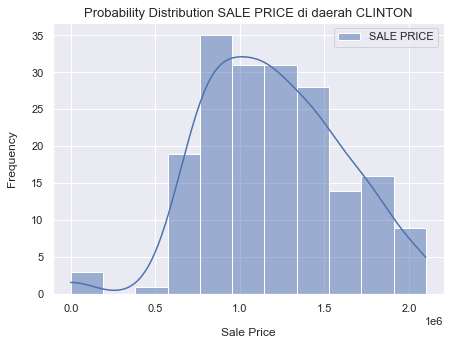

In [475]:
# view distribution
sns.set(rc={'figure.figsize':(7,5)})
sns.histplot(df_stdv, color='darkslategrey', kde=True)
plt.xlabel('Sale Price', labelpad=14)
plt.ylabel('Frequency', labelpad=14)
plt.title('Probability Distribution SALE PRICE di daerah CLINTON', y=1, fontsize=13)

#### Kesimpulan: 
Dari grafik yang ditampilkan dapat dilihat bahwa Probability Distribution harga penjualan (SALE PRICE) dari daerah sekitar Clinton **sudah berdistribusi normal**

## 10. Confidence Intervals
***
Pada bagian ini, saya akan mengimplementasikan Confidence Intervals, yaitu rentang antara dua nilai dimana nilai suatu Sample Mean tepat berada di tengah-tengahnya.
#### Question: 
Bagaimana Confidence Intervals dari LAND SQUARE FEET Properti di New York City pada tahun 2016 dan 2017?

Text(0, 0.5, 'Frekuensi')

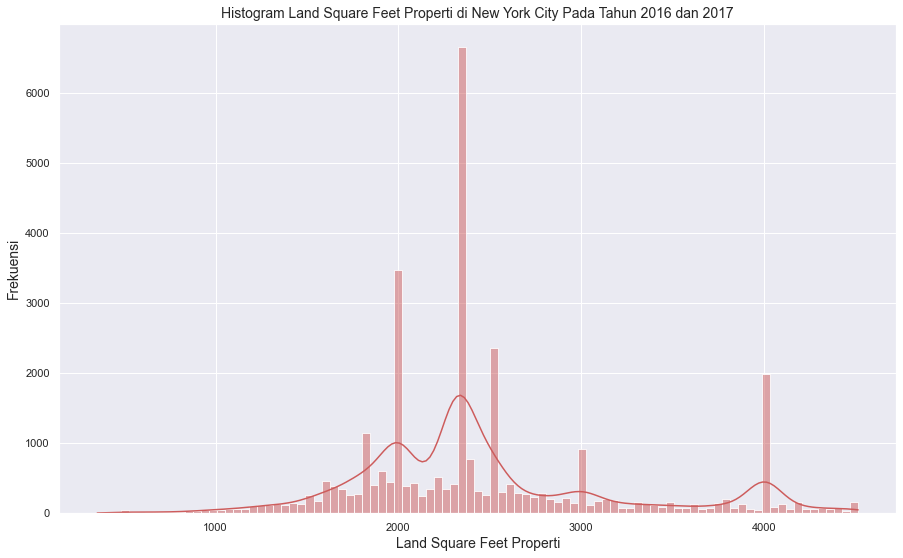

In [476]:
df_landsq = df_sales['LAND SQUARE FEET']
np.log(df_landsq)
plt.figure(figsize=(15,9))
sns.histplot(df_landsq, kde=True, color='indianred')
plt.title('Histogram Land Square Feet Properti di New York City Pada Tahun 2016 dan 2017', fontsize=14)
plt.xlabel('Land Square Feet Properti', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)

#### Analisis: 
Dapat kita lihat pada grafik diatas, frekuensi tertinggi pada land square feet properti berada pada rentang 2000 - 2500 satuan luas. Karena pada grafik tersebut distribusi data pada atribut 'LAND SQUARE FEET' belum berdistribusi normal, maka kita bisa melakukan **Central Limit Theorem** agar membuat distribusi menjadi normal

## Central Limit Theorem

In [477]:
# Mengambil sejumlah 1500 sample mean dari sejumlah 150 nilai acak.
r = 150
s = 1500
sample_mean_landsq = []
for i in range(s):
    # random sampling done with replacement
    nilai_sampel = np.random.choice(a=df_landsq,size=r)
    sample_mean_landsq.append(np.mean(nilai_sampel))

Text(0, 0.5, 'Frekuensi')

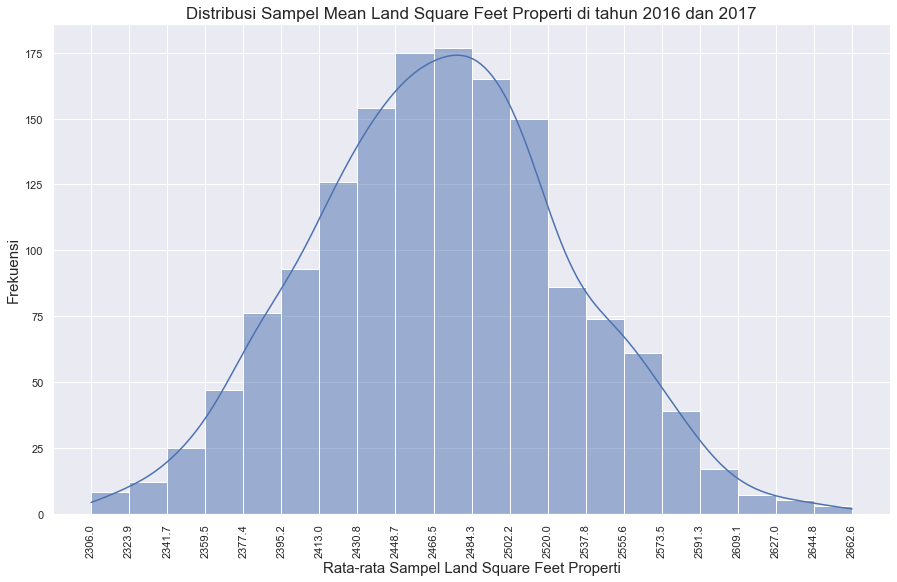

In [478]:
count, bin_edges = np.histogram(sample_mean_landsq, bins=20)
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_mean_landsq, kde=True, bins=20, ax=ax)
ax.set_title('Distribusi Sampel Mean Land Square Feet Properti di tahun 2016 dan 2017',
             fontsize=17)
ax.set_xlabel('Rata-rata Sampel Land Square Feet Properti', fontsize=15)
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi', fontsize=15)

#### Analisis: 
Distribusi sample means sudah terlihat normal. Kurva cukup simetris di sekitar nilai tengah dan median kira-kira setara dengan mean (lihat dibawah). Berdasarkan central limit theorem, pengambilan sampel dalam jumlah yang cukup dengan ukuran yang memadai akan menghasilkan distribusi sampel means yang normal.

## Calculate Sampling Distribution (sample size = 150) Summary Statistics

In [479]:
# Calculate Median Of Sample Means
median_of_sample = np.median(sample_mean_landsq)
print('Median sampel mean LAND SQUARE FEET = ', median_of_sample)

Median sampel mean LAND SQUARE FEET =  2470.806666666667


In [480]:
# Calculate Mean Of Sample Means
mean_of_sample = np.mean(sample_mean_landsq)
print('Rata-rata sampel mean LAND SQUARE FEET = ', mean_of_sample)

Rata-rata sampel mean LAND SQUARE FEET =  2470.2361066666667


In [481]:
# Calculate Standard Deviation of Sample Means
std_of_sample = np.std(sample_mean_landsq)
print('Standar Deviasi sampel mean LAND SQUARE FEET = ', std_of_sample)

Standar Deviasi sampel mean LAND SQUARE FEET =  60.033085003229


In [482]:
# Equation for Standard Deviation Of Sampling Distribution
pop_std_landsq = df_landsq.std()
# standard error
standar_error = pop_std_landsq/np.sqrt(r) # r is sample size
standar_error

60.19088119606155

In [483]:
# Critical Z-Scores
z_score = 1.96
# Hitung batas yang tepat untuk area dimana 95% mean sampel berada dari mean populasi
lower_bound_landsq = np.mean(mean_of_sample) - z_score*standar_error
upper_bound_landsq = np.mean(mean_of_sample) + z_score*standar_error
lower_bound_landsq, upper_bound_landsq

(2352.261979522386, 2588.2102338109476)

Text(0.5, 0, 'Sampel Mean Land Square Feet of New York City Properties')

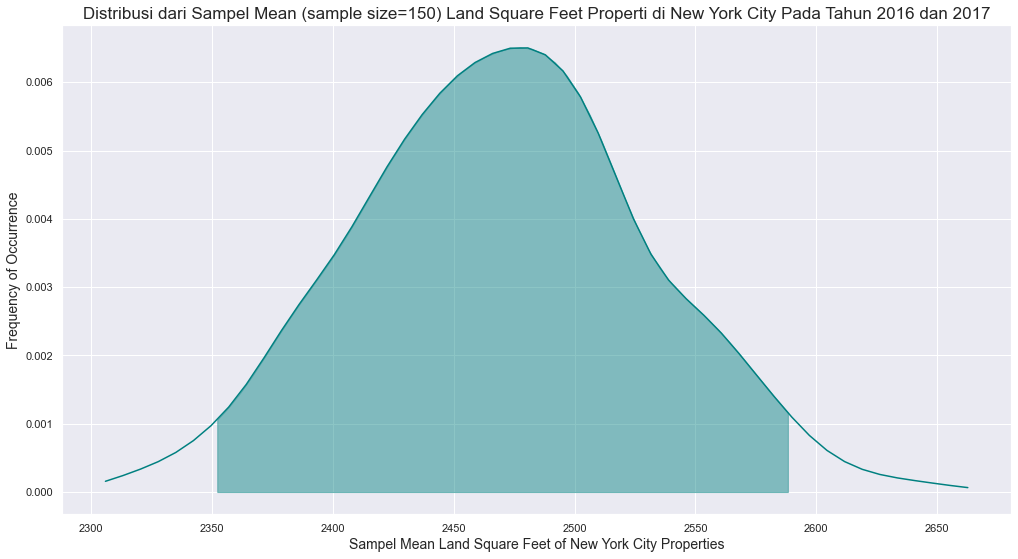

In [484]:
# Gambar Histogram Akhir
plt.figure(figsize=(17,9))
kde = scistats.gaussian_kde(sample_mean_landsq)
pos = np.linspace(np.min(sample_mean_landsq), np.max(sample_mean_landsq))
plt.plot(pos,kde(pos), color='teal')
shade = np.linspace(lower_bound_landsq, upper_bound_landsq)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title('Distribusi dari Sampel Mean (sample size=150) Land Square Feet Properti di New York City Pada Tahun 2016 dan 2017', y=1, fontsize=17)
plt.ylabel('Frequency of Occurrence', fontsize=14)
plt.xlabel('Sampel Mean Land Square Feet of New York City Properties',fontsize=14)

#### Kesimpulan: 
Dari perhitungan hasil ringkasan statistik diatas, maka dapat disimpulkan:
* Dari nilai standard error diatas dapat kita lihat nilainya kurang lebih sama dengan Standar Deviasi sampel mean LAND SQUARE FEET
* Berdasarkan hasil perhitungan z-score di atas, didapatkan nilai lower 95% bound sebesar 2352.261979522386 dan upper 95% bound sebesar 2588.2102338109476, yang berarti nilai yang dihasilkan berada pada rentang: <br>
**2352.261979522386 < x < 2588.2102338109476** satuan luas

## 11. Hypothesis Testing
***
Pada bagian ini, saya akan Membuat 1 hipotesis dan menarik kesimpulan yang ada
#### Question: 
Apakah wilayah Manhattan memiliki SALE PRICE rata-rata yang lebih tinggi secara signifikan daripada wilayah Queens? <br> <br>
**H0** : *the distributions of all samples are equal* <br>

**H1** : *the distributions of one or more samples are not equal*

In [485]:
df_wilayah = df_sales[['BOROUGH', 'SALE PRICE']]
df_queens = df_wilayah[df_wilayah['BOROUGH'] == 'Queens']
df_queens.head()

,BOROUGH,SALE PRICE
17089,Queens,792000.0
17090,Queens,10.0
17091,Queens,275500.0
17092,Queens,970000.0
17093,Queens,425000.0


In [486]:
df_manhattan = df_wilayah[df_wilayah['BOROUGH'] == 'Manhattan']
df_manhattan.head()

,BOROUGH,SALE PRICE
0,Manhattan,620000.0
1,Manhattan,762669.0
2,Manhattan,772851.0
3,Manhattan,1034880.0
4,Manhattan,800000.0


In [487]:
n1 = len(df_queens)
me1 = df_queens['SALE PRICE'].mean()
sd1 = df_queens['SALE PRICE'].std()

(n1, me1, sd1)

(10523, 625807.1177420887, 320874.4655168475)

In [488]:
n2 = len(df_manhattan)
me2 = df_manhattan['SALE PRICE'].mean()
sd2 = df_manhattan['SALE PRICE'].std()

(n1, me2, sd2)

(10523, 1093167.214659686, 504057.0072388886)

In [489]:
z_score, pvalue = sm.stats.ztest(df_queens['SALE PRICE'].dropna(),
                                 df_manhattan['SALE PRICE'].dropna(),alternative='two-sided')
pvalue

0.0

### Penarikan Kesimpulan

In [490]:
if pvalue > 0.05:
    print("H0 diterima")
else:
    print("H1 diterima")

H1 diterima


In [491]:
print("H1 : the distributions of one or more samples are not equal")

H1 : the distributions of one or more samples are not equal


### Display Data Distribution

Text(0, 0.5, 'FREQUENCY')

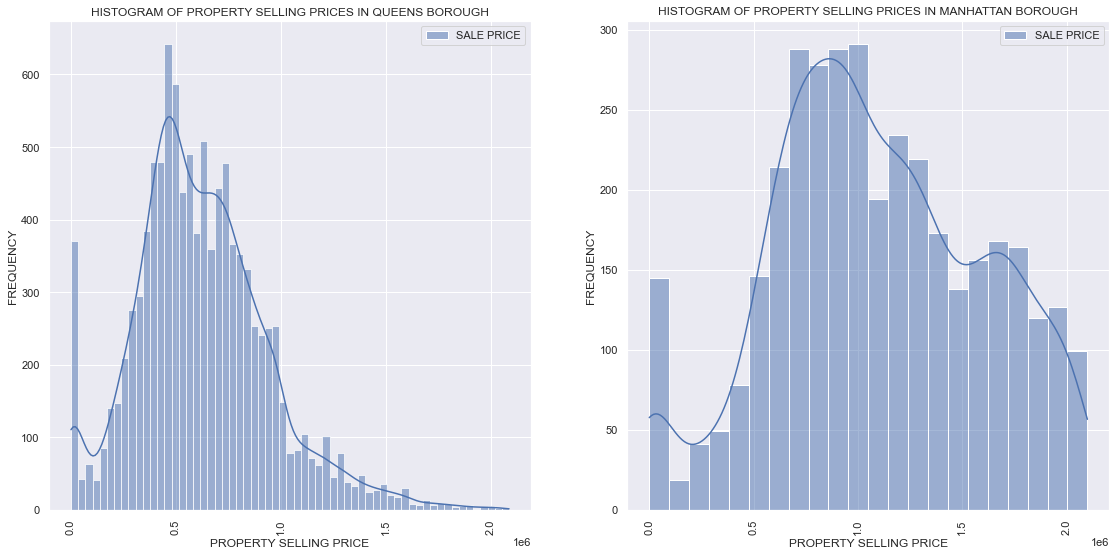

In [492]:
# menampilkan distribusi dari data penjualan wilayah Queens dan Manhattan
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for Queens
sns.histplot(df_queens, kde=True, ax=ax)
ax.set_title('HISTOGRAM OF PROPERTY SELLING PRICES IN QUEENS BOROUGH')
ax.set_xlabel('PROPERTY SELLING PRICE')
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('FREQUENCY')

# Plotting for Manhattan
sns.histplot(df_manhattan, kde=True, ax=ax0)
ax0.set_title('HISTOGRAM OF PROPERTY SELLING PRICES IN MANHATTAN BOROUGH')
ax0.set_xlabel('PROPERTY SELLING PRICE')
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('FREQUENCY')

### Kita juga dapat memplot histrogram dari data untuk memeriksa apakah kira-kira distribusinya mengikuti distribusi normal

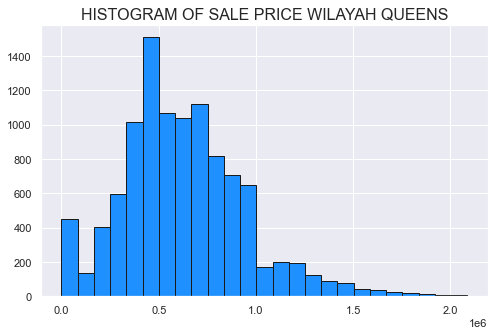

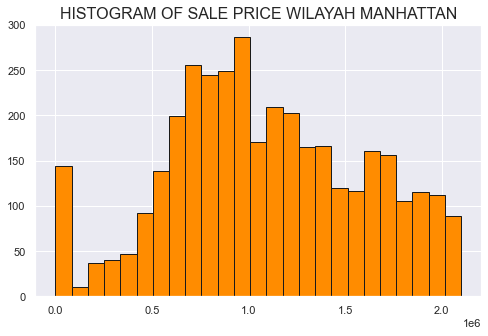

In [493]:
# Plotting for Queens Borough
plt.figure(figsize=(8,5))
plt.title('HISTOGRAM OF SALE PRICE WILAYAH QUEENS', fontsize=16)
plt.hist(df_queens["SALE PRICE"].dropna(),edgecolor='k', color='dodgerblue',bins=25)
plt.show()

# Plotting for Manhattan Borough
plt.figure(figsize=(8,5))
plt.title('HISTOGRAM OF SALE PRICE WILAYAH MANHATTAN', fontsize=16)
plt.hist(df_manhattan["SALE PRICE"].dropna(),edgecolor='k', color='darkorange',bins=25)
plt.show()

#### Kesimpulan: 
karena nilai *p-value* kurang dari 0.05 (sangat kecil), kita dapat **reject the Null hypothesis** bahwa rata-rata SALE PRICE wilayah Manhattan lebih tinggi secara signifikan daripada SALE PRICE wilayah Queens. Catatan, kita menggunakan alternative='two-sided' dlm z-test krn disini kita memeriksa ketidaksamaan.

## 12. Overall Analysis
***
Untuk kesimpulan dan analisis keseluruhan pada tugas ini yang sudah saya lakukan diantaranya:
1. Nilai mean atau rata-rata untuk SALE PRICE NYC Property Sales yang didapatkan berdasarkan masing-masing kolom NEIGHBORHOOD yaitu sebesar **7.759725e+07** yang dicari dengan implementasi numpy dan pandas.
2. Nilai median dari GROSS SQUARE FEET pada dataset NYC Property Sales adalah senilai 1680.0 dan median dari LAND SQUARE FEET pada dataset NYC Property Sales adalah 2325.0
3. Hasil dari nilai modus/mode banyaknya YEAR BUILT dari NEIGHBORHOOD RIVERDALE adalah 1930 yang muncul sebanyak 10 kali. Berarti pada tahun 1930, NEIGHBORHOOD RIVERDALE banyak melakukan penjualan atau transaksi sebanyak 10 kali.
4. Dari hasil perhitungan menggunakan numpy dan pandas didapatkan range atau rentang data SALE PRICE dari wilayah Staten Island adalah 1899999.0 dimana nilai terbesar (max) SALE PRICE 1900000.0 dan nilai terkecil (min) SALE PRICE 1.0.
5. Sampel Variance dari SALE PRICE adalah sebesar 201078224445.29733 dan sampel variance dari TOTAL UNITS adalah sebesar 0.4475046639738487
6. Sampel Standard Deviation dari SALE PRICE adalah sebesar 448417.4667040718 dan sampel Standard Deviation dari TOTAL UNITS adalah sebesar 0.6689578940216258
7. Dari grafik Probability Distribution, dapat kita ketahui bahwa harga penjualan (SALE PRICE) dari daerah sekitar Clinton **sudah berdistribusi normal**
8. Berdasarkan confidence intervals, didapatkan nilai lower 95% bound sebesar 2352.261979522386 dan upper 95% bound sebesar 2588.2102338109476, yang berarti nilai yang dihasilkan berada pada rentang: <br>
**2352.261979522386 < x < 2588.2102338109476** satuan luas.
9. Pada hypothesis testing, karena nilai *p-value* kurang dari 0.05 (sangat kecil), kita dapat **reject the Null hypothesis** bahwa rata-rata SALE PRICE wilayah Manhattan lebih tinggi secara signifikan daripada SALE PRICE wilayah Queens.